In [12]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

from environments.CleanPlantSimulator import CleanPlantSimulator

In [13]:
env = CleanPlantSimulator()

#### Test different lighting policies

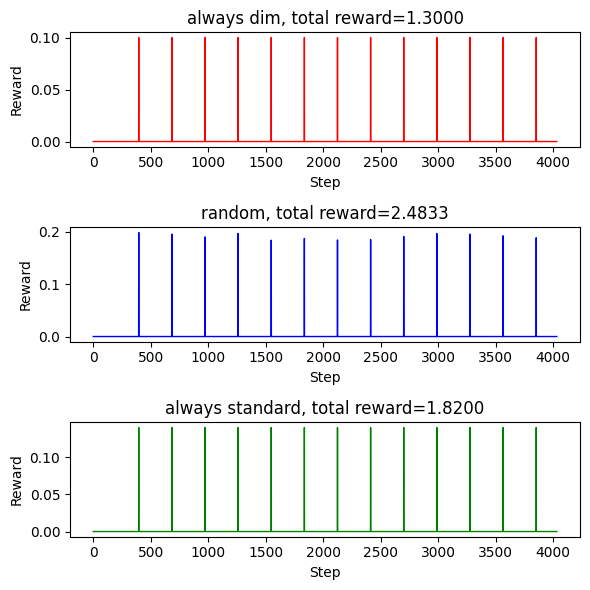

In [14]:
COLORS = ["r", "b", "g"]
LABELS = ["always dim", "random", "always standard"]
fig, ax = plt.subplots(3, 1, figsize=(6, 6))

policy1 = np.ones(env.total_steps) * 50
policy2 = np.random.choice([50, 80, 110, 140], env.total_steps)
policy3 = np.ones(env.total_steps) * 70
policy = [policy1, policy2, policy3]

for i in [0, 1, 2]:
    R = []
    TOD = []
    AREA = []
    pol = policy[i]

    s, info = env.start()
    daytime_step = 0
    for _ in range(env.total_steps):
        tod = s[0]
        if tod.hour >= 21 or tod.hour < 9:
            action = 0
        else:
            action = pol[daytime_step]
        reward, s, done, info = env.step(action)
        R.append(reward)
        TOD.append(tod.hour * 60 + tod.minute)
        AREA.append(s[1])
        daytime_step += 1

    R = np.array(R)
    ax[i].plot(R, linewidth=1, color=COLORS[i])
    ax[i].set_title(f"{LABELS[i]}, total reward={np.sum(R):.4f}")
    ax[i].set_xlabel("Step")
    ax[i].set_ylabel("Reward")

fig.tight_layout()

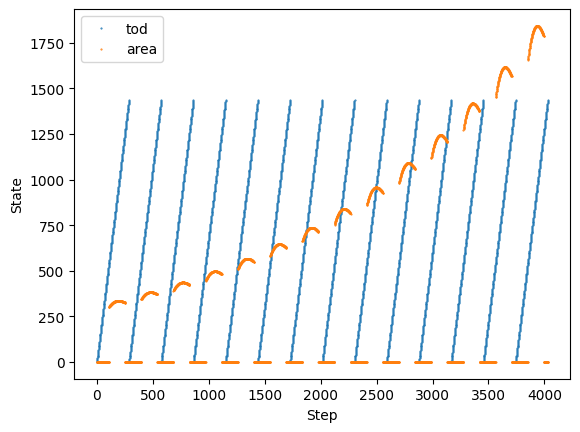

In [15]:
fig, ax = plt.subplots(1, 1)
TOD = np.array(TOD)
AREA = np.array(AREA)
ax.plot(TOD, ".", markersize=1, label="tod")
ax.plot(AREA, ".", markersize=1, label="area")

ax.set_ylabel("State")
ax.set_xlabel("Step")
ax.legend()
# plt.xlim([72*5, 72*10])
# plt.ylim([0, 0.1])